## Part 1: Import Statements

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [4]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [5]:
#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [6]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

In [7]:
X_train.sample(5)

1587     ladies nigga always wan na go party every week...
5174                lol feel like punk bitch sittin lights
5736     spitted sprite niggah yo smaass mouth deserved...
12586    lmao comeback says twat sides head shaved like...
18962    saw someone riding bike wearing camo bitch ask...
Name: tweet, dtype: object

## Part 4: Feature Extraction

1. Count Vectorizing

**Unigrams**

In [8]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 13309,
 'spoiling': 12986,
 'fags': 4628,
 'wcw': 15221,
 'babes': 805,
 'love': 8196,
 'thse': 14058,
 'sexy': 12145,
 'bitches': 1302,
 'bestfriend': 1181,
 'babe': 804,
 'yanks': 15762,
 'coming': 2736,
 'disparagement': 3764,
 'pride': 10705,
 'rather': 11121,
 'jack': 7110,
 'fuck': 5249,
 'hoes': 6379,
 'tbh': 13780,
 'shit': 12260,
 'boring': 1545,
 'give': 5558,
 'wife': 15449,
 'lmfao': 8072,
 'little': 8038,
 'like': 7968,
 'message': 8649,
 'hoe': 6363,
 'need': 9246,
 'plan': 10391,
 'stuff': 13400,
 'thats': 13929,
 'saying': 11886,
 'ive': 7100,
 'pinto': 10352,
 'since': 12441,
 'dude': 4065,
 'iphone': 7026,
 'beginning': 1107,
 'gerryshalloweenparty': 5478,
 'halloween': 5985,
 'yesterday': 15833,
 'stupid': 13412,
 'nigger': 9376,
 'youre': 15879,
 'dismissed': 3761,
 'bitch': 1290,
 'wan': 15127,
 'na': 9137,
 'play': 10412,
 'thumper': 14070,
 'tounge': 14276,
 'punching': 10878,
 'smelly': 12671,
 'turtle': 14530,
 'pussy': 10907,
 'lady': 7669,
 'next': 9

Vocabulary of train and test set with respective counts

In [9]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [10]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

2. TFIDF Vectorization

**TFIDF Vectorizing unigrams**

In [11]:
#TFIDF Vectorizing the X_train
tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


3. Balancing training data

In [12]:
def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data for unigram

In [13]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling TFIDF-Vectorized  training data for unigram

In [14]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


## Model Evaluation

In [16]:
# function for plotting confusion matrix
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_test, y_preds)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## Logistic Regression

In [17]:
# Define the grid of hyperparameters
param_grid = {
    'C': np.logspace(-2, 2, 10),  # Logarithmically spaced values between 10^-2 and 10^2
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver': ['newton-cg', 'lbfgs']  
}

## Count Vectorization

Countvectorized unigrams

In [18]:
# Initalising model
lr = LogisticRegression(max_iter = 200, penalty='l2') #penalty parameter was chosen according to literature review results
# Train and predict
lr.fit(X_train_over_count, y_train_over_count)
y_preds = lr.predict(X_test_count)


              precision    recall  f1-score   support

        Hate       0.32      0.48      0.38       280
   Offensive       0.95      0.89      0.92      3715
     Neither       0.80      0.91      0.85       778

    accuracy                           0.87      4773
   macro avg       0.69      0.76      0.72      4773
weighted avg       0.89      0.87      0.88      4773

The confusion matrix:
[[ 135  129   16]
 [ 260 3300  155]
 [  28   45  705]]


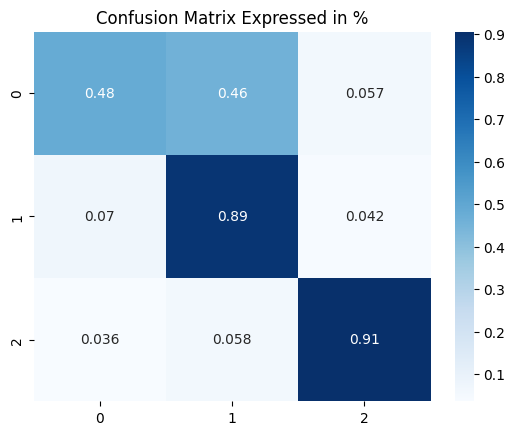

In [19]:
# output statistics
printModelStats(y_preds, y_test)

Random Search for optimization

In [ ]:
# Define the logistic regression model
lr = LogisticRegression(max_iter=200, penalty='l2')  

random_search_lr_count = RandomizedSearchCV(lr, param_grid, cv=3, n_iter=8, scoring='f1', n_jobs=-1) 

In [ ]:
random_search_lr_count.fit(X_train_over_count, y_train_over_count)

In [ ]:
# Best hyperparameters
best_params_lr_count = random_search_lr_count.best_params_
print("Best hyperparameters:", best_params_lr_count)

Best hyperparameters
 <br>
C: 100
 <br>
multi_class: auto
 <br>
solver: lbfgs

c:\Users\Sara Knapp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        Hate       0.24      0.38      0.29       280
   Offensive       0.93      0.88      0.90      3715
     Neither       0.81      0.82      0.82       778

    accuracy                           0.84      4773
   macro avg       0.66      0.69      0.67      4773
weighted avg       0.87      0.84      0.85      4773

The confusion matrix:
[[ 105  157   18]
 [ 304 3281  130]
 [  33  104  641]]


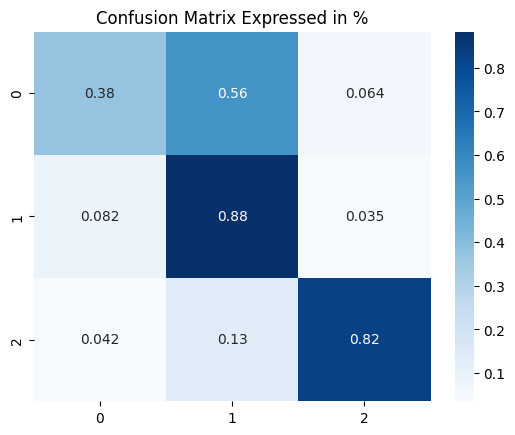

In [20]:
# Final model performance
lr = LogisticRegression(max_iter = 200, penalty='l2', C=100, multi_class='auto', solver='lbfgs') 
lr.fit(X_train_over_count, y_train_over_count)
y_preds = lr.predict(X_test_count)
printModelStats(y_preds, y_test)

## TFIDF

TFIDF unigrams

In [21]:
# Initalising model
lr = LogisticRegression(max_iter = 200, penalty='l2') 
# Train and predict
lr.fit(X_train_over_tf, y_train_over_tf)
y_preds = lr.predict(X_test_tf)


              precision    recall  f1-score   support

        Hate       0.34      0.55      0.42       280
   Offensive       0.96      0.88      0.92      3715
     Neither       0.78      0.93      0.85       778

    accuracy                           0.87      4773
   macro avg       0.69      0.78      0.73      4773
weighted avg       0.89      0.87      0.88      4773

The confusion matrix:
[[ 154  105   21]
 [ 271 3266  178]
 [  26   32  720]]


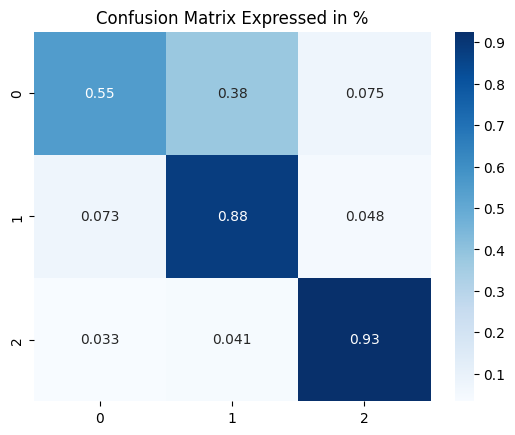

In [22]:
# output statistics
printModelStats(y_preds, y_test)

Random Search for optimization

In [ ]:
# Define the logistic regression model
lr = LogisticRegression(max_iter=200, penalty='l2')  

random_search_lr_tf = RandomizedSearchCV(lr, param_grid, cv=3, n_iter=8, scoring='f1', n_jobs=-1) 

In [19]:
random_search_lr_tf.fit(X_train_over_tf, y_train_over_tf)

In [ ]:
# Best hyperparameters
best_params_lr_tf = random_search_lr_tf.best_params_
print("Best hyperparameters:", best_params_lr_count)

Best hyperparameters
 <br>
C: 10
 <br>
multi_class: auto
 <br>
solver: newton-cg

              precision    recall  f1-score   support

        Hate       0.30      0.40      0.35       280
   Offensive       0.94      0.90      0.92      3715
     Neither       0.82      0.87      0.84       778

    accuracy                           0.87      4773
   macro avg       0.69      0.72      0.70      4773
weighted avg       0.88      0.87      0.87      4773

The confusion matrix:
[[ 112  151   17]
 [ 230 3349  136]
 [  26   73  679]]


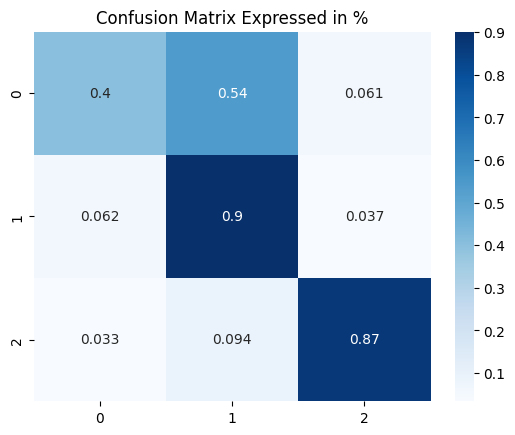

In [23]:
# Final model performance
lr = LogisticRegression(max_iter = 200, penalty='l2', C=10, multi_class='auto', solver='newton-cg') 
lr.fit(X_train_over_tf, y_train_over_tf)
y_preds = lr.predict(X_test_tf)
printModelStats(y_preds, y_test)